# Proyecto C&P
Desarrollar una automatización que permita extraer e interpretar la data del archivo Student-mat.csv y Student-por.csv de manera que una la información solicitada de ambos archivos y realice los requerimientos solicitados

Dataset tomado de:
https://archive.ics.uci.edu/dataset/320/student+performance

# Importar los datos a python

In [1]:
# normalmente los archivos .csv viene separados por, en este caso especial estan con ;


import pandas as pd
from IPython.core.display import HTML


file1="student-mat.csv"
file2="student-por.csv"

def open_csv(file):
    data=pd.read_csv(file,sep=";") # siempre lo lee como dataframe
    return data

data_mat=open_csv(file1)
data_por=open_csv(file2)

#display(HTML(data_mat.to_html())) # print
print("__________________Data MAT___________________")
data_mat.info()
print("__________________Data POR___________________")
data_por.info()

__________________Data MAT___________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nurs

In [4]:
display(HTML(data_mat.to_html())) # print

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10
5,GP,M,16,U,LE3,T,4,3,services,other,reputation,mother,1,2,0,no,yes,yes,yes,yes,yes,yes,no,5,4,2,1,2,5,10,15,15,15
6,GP,M,16,U,LE3,T,2,2,other,other,home,mother,1,2,0,no,no,no,no,yes,yes,yes,no,4,4,4,1,1,3,0,12,12,11
7,GP,F,17,U,GT3,A,4,4,other,teacher,home,mother,2,2,0,yes,yes,no,no,yes,yes,no,no,4,1,4,1,1,1,6,6,5,6
8,GP,M,15,U,LE3,A,3,2,services,other,home,mother,1,2,0,no,yes,yes,no,yes,yes,yes,no,4,2,2,1,1,1,0,16,18,19
9,GP,M,15,U,GT3,T,3,4,other,other,home,mother,1,2,0,no,yes,yes,yes,yes,yes,yes,no,5,5,1,1,1,5,0,14,15,15


# 1)

Para ambos archivos: Cree un DataFrame para cada escuela, con el formato de nombre “nombrecolegio_curso” que reúna los datos de las columnas: school, sex, age, address, Pstatus, guardian, traveltime, studytime, failures, paid, internet, health, absences, G1,G2,G3

In [14]:
# crear un dataframe en el que se filtre por las columnas solicitadas

#filtro por columnas el dataframe completo 

df_mat=data_mat[["school", "sex", "age", "address", "Pstatus", "guardian", "traveltime", "studytime", "failures", "paid", "internet", "health", "absences", "G1","G2","G3"]]
df_por=data_por[["school", "sex", "age", "address", "Pstatus", "guardian", "traveltime", "studytime", "failures", "paid", "internet", "health", "absences", "G1","G2","G3"]]

#Ahora filtro por filas para separar los colegios
#groupby -> agrupar por filtro de busqueda para crear un nuevo df

#groupby busca cosas repetidas en la columna y las agrupa, crea un diccionario donde
#la key es ese valor que encontro repetido y el value es un dataframe con las filas que contienen ese valor
df_mat_sep=df_mat.groupby(["school"])
df_por_sep=df_por.groupby(["school"])


# aplico el filtro para mat y separo los dataframe por escuela
for key,group in df_mat_sep:
    
    if key=="GP":
        #print(f"la key es : {key} y el grupo es : \n {group}")
        gp_mat=group
        
    elif key=="MS":
        #print(f"la key es : {key} y el grupo es : \n {group}")
        ms_mat=group

        
for key,group in df_por_sep:
    
    if key=="GP":
        #print(f"la key es : {key} y el grupo es : \n {group}")
        gp_por=group
        
    elif key=="MS":
        #print(f"la key es : {key} y el grupo es : \n {group}")
        ms_por=group        
        
'''
Recapitulando:
Tengo:

# dataframes originales _ Raw data
data_mat
data_por

# df con las columnas filtradas
df_mat
df_por


# cada materia separada para cada colegio 
gp_mat
ms_mat
gp_por
ms_por
'''
#display(HTML(ms_por.to_html())) # print


'\nRecapitulando:\nTengo:\n\n# dataframes originales _ Raw data\ndata_mat\ndata_por\n\n# df con las columnas filtradas\ndf_mat\ndf_por\n\n\n# cada materia separada para cada colegio \ngp_mat\nms_mat\ngp_por\nms_por\n'

# 2
Verifique que no haya data de valor nulo (NaN), en caso de encontrar algún valor NaN se deberá eliminar toda la fila


In [ ]:
# normalmente eso es lo primero que se hace despues de tener la raw data
# filtro y limpio los valores nulos

# dropna elimina toda la fila si encuentra un valor nulo, se puede especificar para que lo haga
# en una columna especifica, en este caso se hace generico

# axis =0 filas
# axis =1 columnas
gp_mat=gp_mat.dropna(how="any",axis=0)
ms_mat=ms_mat.dropna(how="any",axis=0)
gp_por=gp_por.dropna(how="any",axis=0)
ms_por=ms_por.dropna(how="any",axis=0)

# 3
Para cada escuela muestre un grafico circular(pastel) donde se evidencie el porcentaje de estudiantes hombres y mujeres de cada curso

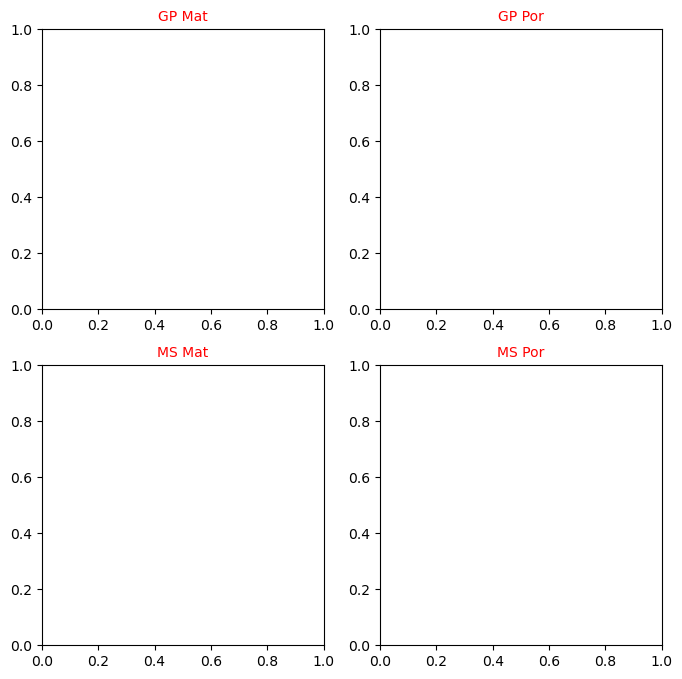

In [26]:
#print(gp_mat["sex"].value_counts()) # separa y cuenta las cosas repetidaas

import matplotlib.pyplot as plt

plt.figure(figsize=(8,8))
#subplot(filas columnas cuadrante)
ax1=plt.subplot(221)
ax2=plt.subplot(222)
ax3=plt.subplot(223)
ax4=plt.subplot(224)


ax1.set_title("GP Mat",fontsize=10,color="red")
ax2.set_title("GP Por",fontsize=10,color="red")
ax3.set_title("MS Mat",fontsize=10,color="red")
ax4.set_title("MS Por",fontsize=10,color="red")




plt.show()

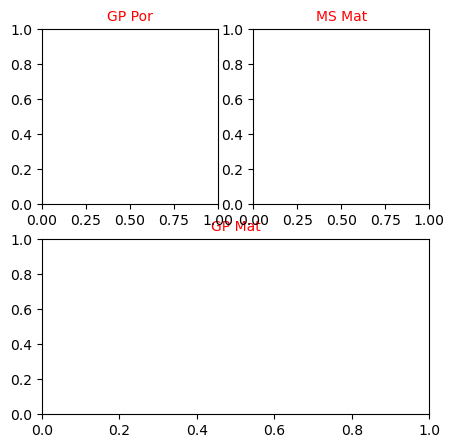

In [36]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5,5))
#subplot(filas columnas cuadrante)
ax1=plt.subplot(212)
ax2=plt.subplot(221)
ax3=plt.subplot(222)


ax1.set_title("GP Mat",fontsize=10,color="red")
ax2.set_title("GP Por",fontsize=10,color="red")
ax3.set_title("MS Mat",fontsize=10,color="red")



plt.show()